# Семинар 1: знакомство с NumPy


- документация: http://www.numpy.org/

## С чем работает NumPy?

Основной сущностью NumPy является **массив** (*array*). Библиотека является удобным инструментом для работы с массивами с возможностью векторизации вычислений. 

In [2]:
import numpy as np

Рассмотрим базовые вещи, которые можно делать с помощью библиотеки NumPy. Массив проще всего создавать 
- из списка (списков) чисел при помощи `np.array()`

In [133]:
np.array([1, 3, 13, 57, -90])

array([  1,   3,  13,  57, -90])

- посредством генераторов из самой библиотеки (например, `np.zeros()`)

In [161]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

Два массива выше были одномерными (т.е. не имели вложенности). Однако массивы не всегда должны быть такими. 

Они могут быть:
- (нульмерным, скаляром (*0D array*))

In [305]:
np.array(-13384327473)

array(-13384327473, dtype=int64)

- одномерными (*1D array*)

In [163]:
np.array([1, 3, 13, 57, -90])

array([  1,   3,  13,  57, -90])

- двухмерными (*2D array*)

In [171]:
np.array([[1, 2, 3], [4, 5, 6]])

array([[1, 2, 3],
       [4, 5, 6]])

- трехмерными (*3D array*)

In [292]:
np.zeros((2, 3, 4))

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

- принцип понятен...

## Что мы знаем про массив?

Давайте возьмем с вами 3-хмерный массив и запишем его в переменную `vec`.

In [209]:
vec = np.array([[1, 2], [3, 4], [5, 6]])

In [211]:
vec

array([[1, 2],
       [3, 4],
       [5, 6]])

In [213]:
print(vec)

[[1 2]
 [3 4]
 [5 6]]


Можем посмотреть тип содержащихся в нем данных при помощи `dtype` (отсылка на [pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html)).

In [218]:
vec.dtype

dtype('int32')

In [202]:
vec_float = np.array([[1.1, 2.2], [3.3, 4.4], [5.5, 6.6]])
vec_float.dtype

dtype('float64')

In [265]:
vec_bool = np.array([[True, True], [False, False]])
vec_bool.dtype

dtype('bool')

In [234]:
vec_mix = np.array([[1, 2.2], [3.3, 4], [5.5, 6.6]])
# vec_mix.dtype

In [236]:
vec_mix_2 = np.array([[1, 'one'], [2, 'two'], [3, False]])
# vec_mix_2.dtype

**Сравнение типов данных**:

|Pandas        | Python        | NumPy                                                         | Использование                                         |
|---           |---            |---                                                            |---                                                    |
|object        |str или смесь  |string_, unicode_, смешанные типы                              | Текстовые или смешанные числовые и нечисловые значения|
|int64         |int            |int_, int8, int16, **int32**, int64, uint8, uint16, uint32, uint64 | Целые числа                                           |
|float64       |float          |float_, float16, float32, **float64**                              | Числа с плавающей точкой                              |
|bool          |bool           |bool_                                                          | Значения True/False                                   |
|datetime64    |datetime             |datetime64                                                | Значения даты и времени                               |

Подробнее можно прочитать [тут](https://numpy.org/doc/stable/reference/arrays.dtypes.html).

А типы данных можно менять:

In [591]:
vec_bool.astype('int64')

array([[1, 1],
       [0, 0]], dtype=int64)

А вот и тип нашего массива:

In [194]:
type(vec)

numpy.ndarray

Размер массива (опять же отсылка на pandas):

In [277]:
vec.shape

(3, 2)

In [313]:
vec.size  # vec.shape[0] * vec.shape[1]

6

Число осей (по сути, сколькомерный у нас массив):

In [285]:
vec.ndim

2

In [315]:
np.zeros((13, 666, 7)).ndim

3

## Операции с массивами

1. Классические функции `sum()`, `mean()`, `min()` и `max()` с параметром `axis` (опять см. pandas), который позволяет применить эту функцию по разным осям $-$ в данном случае, по строкам или столбцам:

In [321]:
np.sum(vec)  # или vec.sum()

21

In [323]:
np.sum(vec, axis=0)  # по столбцам

array([ 9, 12])

In [325]:
np.sum(vec, axis=1)  # по строкам

array([ 3,  7, 11])

In [336]:
vec.mean(axis=1)

array([1.5, 3.5, 5.5])

2. Транспонируем массив (переворачиваем, чтобы столбцы и строки поменялись местами):

In [341]:
vec.T

array([[1, 3, 5],
       [2, 4, 6]])

In [343]:
vec.transpose()

array([[1, 3, 5],
       [2, 4, 6]])

Обратите внимание, что переменная `vec` не поменялась!

In [346]:
vec

array([[1, 2],
       [3, 4],
       [5, 6]])

3. Меняем размеры массива:

In [349]:
vec.reshape(2, 3)

array([[1, 2, 3],
       [4, 5, 6]])

In [361]:
vec_1d = np.array([1, 3, 13, 57, -90, -365])

In [365]:
vec_1d.reshape(3, 2)

array([[   1,    3],
       [  13,   57],
       [ -90, -365]])

Если один из размеров `-1`, то именение размера массива "постраивается" под другое число.

In [352]:
vec.reshape(-1, 3)

array([[1, 2, 3],
       [4, 5, 6]])

vec.reshape(2, -1)

## Арифметические операции

- Прибавление числа (к каждому элементу):

In [47]:
vec + 1  

array([[2, 3],
       [4, 5],
       [6, 7]])

- Умножение (каждого элемента) на число:

In [49]:
vec * 2

array([[ 2,  4],
       [ 6,  8],
       [10, 12]])

- Возведение (каждого элемента) в степень:

In [377]:
vec**2

array([[ 1,  4],
       [ 9, 16],
       [25, 36]])

- Сложение векторов (каждый элемент с каждым элементом):

In [384]:
vec + vec**2

array([[ 2,  6],
       [12, 20],
       [30, 42]])

Важно следить за размерами (строки одного должны быть равны столбцам другого):

In [392]:
vec + vec_1d

ValueError: operands could not be broadcast together with shapes (3,2) (6,) 

In [398]:
vec + np.array([1, 3])  # к каждой строке прибавляется 1 и 3 соответственно

array([[2, 5],
       [4, 7],
       [6, 9]])

In [433]:
np.array([1, 2, 3]) + np.array([[4], [5], [6]])

array([[5, 6, 7],
       [6, 7, 8],
       [7, 8, 9]])

- Умножение векторов (каждый элемент на каждый элемент):

In [402]:
vec * vec**2

array([[  1,   8],
       [ 27,  64],
       [125, 216]])

Опять же, размерности...

In [404]:
vec * vec_1d

ValueError: operands could not be broadcast together with shapes (3,2) (6,) 

In [406]:
vec * np.array([1, 3]) 

array([[ 1,  6],
       [ 3, 12],
       [ 5, 18]])

- Синус (каждого элемента):

In [57]:
np.sin(vec)

array([[ 0.84147098,  0.90929743],
       [ 0.14112001, -0.7568025 ],
       [-0.95892427, -0.2794155 ]])

- Квадратный корень (каждого элемента):

In [553]:
np.sqrt(vec)

array([[1.        , 1.41421356],
       [1.73205081, 2.        ],
       [2.23606798, 2.44948974]])

- Матричное умножение (`dot()` или `@`)

Строки одной матрицы умножаем на столбцы другой и результаты складываем:
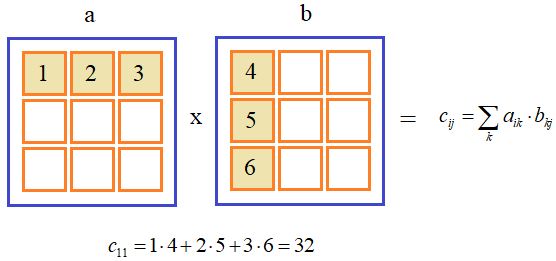

In [435]:
np.array([1, 2, 3]) @ np.array([[4], [5], [6]])

array([32])

Опять размер...

In [437]:
vec.dot(vec**2)

ValueError: shapes (3,2) and (3,2) not aligned: 2 (dim 1) != 3 (dim 0)

In [440]:
vec.dot((vec**2).T)

array([[  9,  41,  97],
       [ 19,  91, 219],
       [ 29, 141, 341]])

In [442]:
vec @ (vec**2).T

array([[  9,  41,  97],
       [ 19,  91, 219],
       [ 29, 141, 341]])

Broadcasting: https://numpy.org/doc/stable/user/basics.broadcasting.html

Базово два измерения совместимы, если:
- они равны
- один из них единица

In [460]:
np.arange(3).reshape(3, 1)

array([[0],
       [1],
       [2]])

In [462]:
vec + np.arange(3).reshape(3, 1)

array([[1, 2],
       [4, 5],
       [7, 8]])

## Индексирование

Все как в пандас и списках!

In [456]:
vec

array([[1, 2],
       [3, 4],
       [5, 6]])

In [445]:
vec[:, 1]  # первый элемент каждой строки

array([2, 4, 6])

In [449]:
vec[2, :]  # вся вторая строка

array([5, 6])

In [451]:
vec[1:2, 0]  # нулевой элемент первой строки

array([3])

In [453]:
vec[::2, :]  # берем каждую вторую строку целиком

array([[1, 2],
       [5, 6]])

## Булевы массивы

In [470]:
is_even = vec % 2 == 0
print(is_even)

[[False  True]
 [False  True]
 [False  True]]


In [472]:
np.sum(is_even)

3

Булевы массивы позволяют вытаскивать элементы с `True` из массива того-же размера

In [476]:
vec[vec % 2 == 0]

array([2, 4, 6])

## Cпецифичные массивы
- Массив из нулей:

In [480]:
np.zeros((2, 3))

array([[0., 0., 0.],
       [0., 0., 0.]])

- Массив из единиц:

In [85]:
np.ones((3, 2))

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

- Массив определенных значений:

In [583]:
np.full((3,3), 5)

array([[5, 5, 5],
       [5, 5, 5],
       [5, 5, 5]])

- Единичная матрица (все нули, а по диагонали единицы):

In [88]:
np.identity(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

- Одномерный интервал:

In [496]:
np.arange(2, 36, 3)  # 3S: start, stop, step

array([ 2,  5,  8, 11, 14, 17, 20, 23, 26, 29, 32, 35])

- Генерация случайных чисел:

`rand()` $-$ заполняет массив заданного размера числами из промежутка [0, 1)

In [494]:
np.random.rand(2, 3)

array([[0.0799658 , 0.23777164, 0.19050393],
       [0.29281662, 0.59932252, 0.15103145]])

In [518]:
np.random.seed(2024)
np.random.rand(2, 3)

array([[0.58801452, 0.69910875, 0.18815196],
       [0.04380856, 0.20501895, 0.10606287]])

`randn()` $-$ заполняет массив заданного размера числами из стандартного отклонения

In [533]:
np.random.randn(3, 2)  # центр - это ноль, а отклонение - это единица

array([[-0.27783169,  1.19399502],
       [ 0.86181533, -0.41704604],
       [-0.24953642,  0.94367735]])

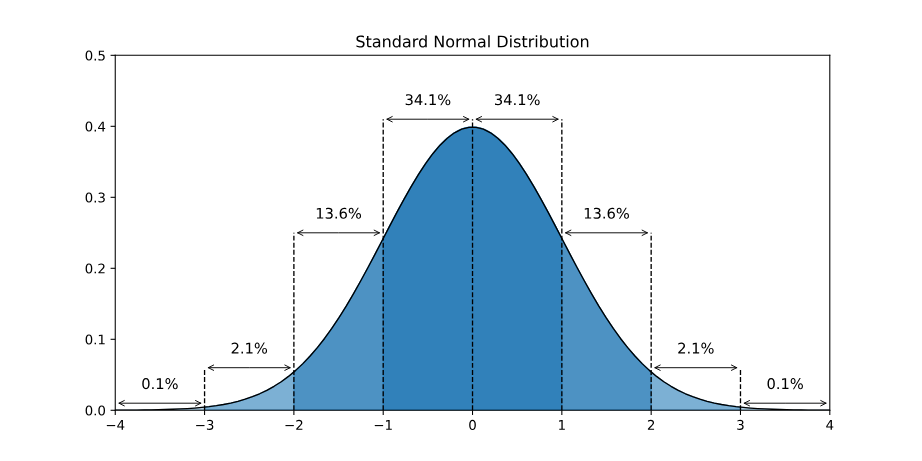

`normal()` $-$ немного по-другому заполняет массив заданного размера числами из стандартного отклонения

In [530]:
np.random.normal(2, 1, size=3)  # центр, отклонение, размер

array([3.05355278, 3.62404261, 0.49936498])

`randint()` $-$ заполняет массив заданного размера целыми числами

In [542]:
np.random.randint(5, 10, size=3)

array([6, 7, 7])

## Объединение массивов

In [545]:
vec

array([[1, 2],
       [3, 4],
       [5, 6]])

- `hstack()` $-$ горизонтальное объединение

In [93]:
np.hstack((vec, np.zeros(vec.shape)))

array([[1., 2., 0., 0.],
       [3., 4., 0., 0.],
       [5., 6., 0., 0.]])

- `vstack()` $-$ вертикальное объединение

In [95]:
np.vstack((vec, np.zeros(vec.shape)))

array([[1., 2.],
       [3., 4.],
       [5., 6.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

- `concatenate()` $-$ конкатенация по одному из измерений

In [569]:
np.concatenate([vec, np.zeros(vec.shape)])

array([[1., 2.],
       [3., 4.],
       [5., 6.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [563]:
np.concatenate([vec, np.zeros(vec.shape)], axis=1)

array([[1., 2., 0., 0.],
       [3., 4., 0., 0.],
       [5., 6., 0., 0.]])

## Почему вообще используют `numpy`?

In [109]:
n = 300
A = np.random.rand(n, n)
B = np.random.rand(n, n)

In [111]:
%%time
C = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        for k in range(n):
            C[i, j] += A[i, k] * B[k, j]

CPU times: total: 11.3 s
Wall time: 13.6 s


In [112]:
%%time
C = A @ B

CPU times: total: 0 ns
Wall time: 20.9 ms


1. Развернуть одномерный массив (сделать так, чтобы его элементы шли в обратном порядке).

In [ ]:
# ┌(▼▼メ)┘ └(メ▼▼)┐

2. Найти максимальный нечетный элемент в массиве.

In [ ]:
# ┌(▼▼メ)┘ └(メ▼▼)┐

3. Замените все нечетные элементы массива на ваше любимое число.

In [ ]:
# ┌(▼▼メ)┘ └(メ▼▼)┐

4. Создайте массив первых n нечетных чисел, записанных в порядке убывания. Например, если `n=5`, то ответом будет `array([9, 7, 5, 3, 1])`. <br>*Функции, которые могут пригодиться при решении: `.arange()`*

In [ ]:
# ┌(▼▼メ)┘ └(メ▼▼)┐

5. Вычислите самое близкое и самое дальнее числа к данному в рассматриваемом массиве чисел. Например, если на вход поступают массив `array([0, 1, 2, 3, 4])` и число `1.33`, то ответом будет `(1, 4)`. <br>_Функции, которые могут пригодиться при решении: `.abs()`, `.argmax()`, `.argmin()`_

In [ ]:
# ┌(▼▼メ)┘ └(メ▼▼)┐

6. Напишите функцию, возвращающую округленную взвешенную сумму оценок по данным оценкам и весам, как это делается в Вышке. Например, вес экзамена равен 0.3, вес домашек - 0.42, вес контрольной - 0.14, вес самостоятельных - 0.14. Например, если за экзамен у вас 7, за домашки 10, за контрольную 8, а за самостоятельные 6, то вы получите отличную оценку 8!

In [ ]:
# ┌(▼▼メ)┘ └(メ▼▼)┐

7. Напишите функцию, меняющую все каждое третье (начиная с 0) значение массива целых чисел на заданное число. Например, если на вход поступает массив `array([3, 5, 1, 0, -3, 22, 213436])` и число `-111`, то на выходе должен получиться массив `array([-111, 5, 1, -111, -3, 22, -111])`.

In [ ]:
# ┌(▼▼メ)┘ └(メ▼▼)┐

8. Напишите функцию, выдающую индексы "близких" элементов заданных массивов, а именно тех пар элементов, чей модуль разницы не превосходит заданного значения. Например, если на вход поступают массив `array([1.5, 0.5, 2, -4.1, -3, 6, -1])`, массив `array([1.2, 0.5, 1, -4, 3, 0, -1.2])` и число `0.5`, то на выходе должен получиться массив `array([0, 1, 3, 6])`.<br>*Не `tuple`, а одномерный массив типа `numpy.ndarray`!"

In [ ]:
# ┌(▼▼メ)┘ └(メ▼▼)┐

9. "Напишите функцию, которая составляет блочную матрицу из четырех блоков, где каждый блок - это заданная матрица. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
\end{pmatrix}
$$
то ответом будет матрица
$$
\begin{pmatrix}
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
\end{pmatrix}
$$

In [ ]:
# ┌(▼▼メ)┘ └(メ▼▼)┐